In [1]:
%run set_theme.ipynb

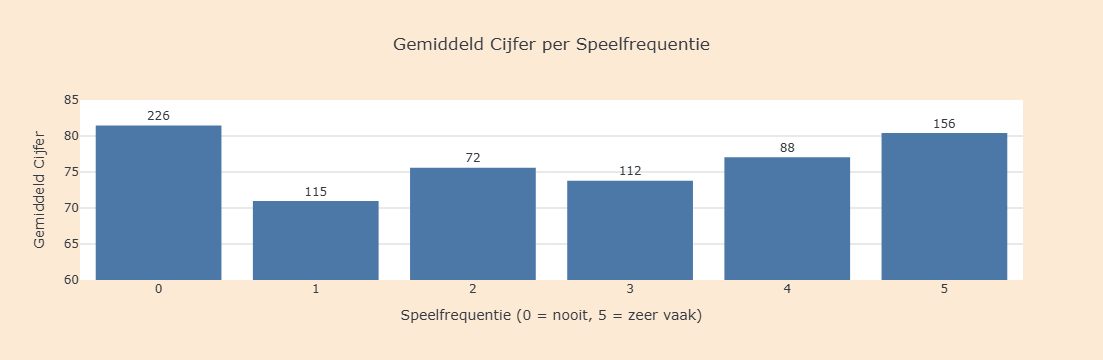

In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Hieronder laad je de datasets in
df1 = pd.read_csv("StudentPerformanceFactors.csv")
df2 = pd.read_csv("gameandgrade.csv")
df3 = pd.read_csv("ResearchInformation3.csv")
df2["Playing Often"] = pd.to_numeric(df2["Playing Often"], errors="coerce")
df2["Grade"] = pd.to_numeric(df2["Grade"], errors="coerce")
df2_clean = df2.dropna(subset=["Playing Often", "Grade"])

summary = df2_clean.groupby("Playing Often")["Grade"].agg(["mean", "count"]).reset_index()
summary.columns = ["Playing Often", "Average Grade", "Number of Students"]

# Bar chart met vaste kleur
fig = px.bar(
    summary,
    x="Playing Often",
    y="Average Grade",
    text="Number of Students",
    title="Gemiddeld Cijfer per Speelfrequentie",
    labels={"Average Grade": "Gemiddeld Cijfer"},
    color_discrete_sequence=["#4C78A8"]  #(donkerblauw)
)

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title="Speelfrequentie (0 = nooit, 5 = zeer vaak)",
    yaxis_title="Gemiddeld Cijfer",
    yaxis=dict(range=[60, 85], gridcolor="lightgrey"),
    plot_bgcolor="white",
    showlegend=False
)

fig.show()